In [4]:
import numpy as np
import random as rndm
from random import random as rnd
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
#Generate the input string
delta = -1
p0 = (1 + delta)/2
p1 = (1 - delta)/2
length = 100
ones = int(p1*length)
str = [0 for i in range(length)]
onesloc = rndm.sample(range(length), ones)
for i in range(len(onesloc)):
    str[onesloc[i]] = 1
# str = ''.join(str)
len(str)

100

In [6]:
#Initialize the System Variables -  Temperatures, Transition Energy and calculate the necessary parameters
Th = 273
Tc = 250
E = 10e-22
Q = 0 #heat transferred
state = 'd'
beta_h = 1.38064852e-23 * Th
beta_c = 1.38064852e-23 * Tc
hot_d = 1/(1 + np.exp(-1*E/beta_h))
hot_u = 1 - hot_d
cold_d = 1/(1 + np.exp(-1*E/beta_c))
cold_u = 1 - cold_d
cold_d, cold_u, hot_d, hot_u

(0.5719273188360384,
 0.4280726811639616,
 0.5659412467880124,
 0.4340587532119876)

In [12]:
Q = 0
for itr in range(1000):
    
    str = ['0' for l in range(length)]
    onesloc = rndm.sample(range(length), ones)
    for l in range(len(onesloc)):
        str[onesloc[l]] = '1'
#     print(''.join(str), '--')
    
    state = 'd'
    for i in range(len(str)):
        if rnd() < hot_u:
            state = 'u'
        else: 
            state = 'd'
      
        if state == 'd' and str[i] == '0':
            if rnd() < cold_u:
                state = 'u'
                str[i] = '1'
                Q = Q + E
        elif state == 'u' and str[i] == '1':
            if rnd() < cold_d:
                state = 'd'
                str[i] = '0'
                Q = Q - E
#     print(''.join(str))
Q/1000

-2.4830999999987712e-20

In [22]:
#Function to calculate net heat transfer - inputs -> delta, ns, nr 
#delta -> determines the proportion of 0s and 1s in the string
#ns -> length of the input string
#nr -> number of iterations

def heat_transfer(delta, ns, nr):
    p0 = (1 + delta)/2
    p1 = (1 - delta)/2
    ones = int(p1*ns)
    Q = 0
    for itr in range(nr):
        str = ['0' for l in range(ns)]
        onesloc = rndm.sample(range(ns), ones)
        for l in range(len(onesloc)):
            str[onesloc[l]] = '1'
        str1 = str
        state = 'd'
        for i in range(len(str)):
            if rnd() < hot_u:
                state = 'u'
            else:
                state = 'd'
            
            if state == 'd' and str[i] == '0':
                if rnd() < cold_u:
                    state = 'u'
                    str[i] = '1'
                    Q = Q + E
            elif state == 'u' and str[i] == '1':
                if rnd() < cold_d:
                    state = 'd'
                    str[i] = '0'
                    Q = Q - E
#                     print('hello')
        str2 = str
        
    return Q/nr

In [23]:
#calculate heat transfer for a range of delta's

delta = np.linspace(-1, 1, 100)
y_delta = [heat_transfer(delta[i], 1000, 1) for i in range(delta.size)]

Text(0, 0.5, 'heat_transfer')

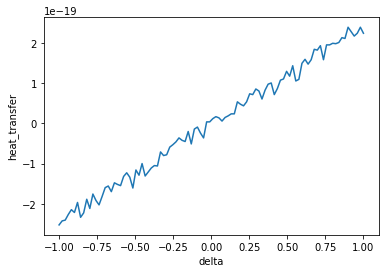

In [24]:
sns.lineplot(x = delta, y = y_delta)
plt.xlabel('delta')
plt.ylabel('heat_transfer')

In [25]:
#Calculate heat transfer for a range of string length's

strlen = np.linspace(1, 100, 100)
y_len = [heat_transfer(0.75, int(strlen[i]), 100) for i in range(strlen.size)]

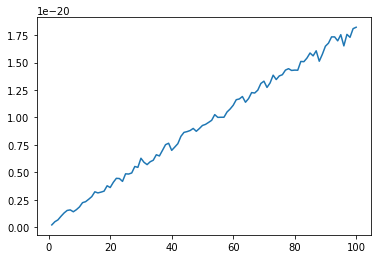

In [26]:
sns.lineplot(x = strlen, y = y_len)

In [27]:
#funtion to calculate information entropy of a given string

def entropy(str):
    str = list(str)
    length = len(str)
    ones1 = 0
    for i in range(length):
        if str[i] == '1':
            ones1 = ones1 + 1
    p11 = ones1/length
    p10 = 1 - p11
    if p11 == 0 or p10 == 0:
        return 0
    ent1 = -p10*(np.log(p10)) - p11*(np.log(p11))
    return ent1
def entropy_dif(str1, str2):
    return entropy(str2) - entropy(str1)

In [28]:
#calculate epsilon parameter

E = 10e-22
def epsilon(Tc, Th):
    return (np.tanh(E/(1.38064852e-23 * Tc)) - np.tanh(E/(1.38064852e-23 * Th)))/(1 - (np.tanh(E/(1.38064852e-23 * Th)))*(np.tanh(E/(1.38064852e-23 * Tc))))

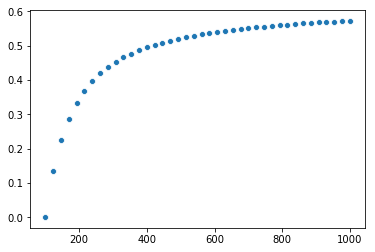

In [29]:
#Observing relationship between epsilon and Temperatures Taking Tc = 100 and varying Th between 100 and 1000

x = np.linspace(100, 1000, 40)
y = [epsilon(100, x[i]) for i in range(40)]
sns.scatterplot(x = x, y = y)

In [30]:
#calculating entropy difference between input and output strings to the refrigerator

def cal_entropy(delta, th, ns, nr):
    Tc = 100
    Th = th
    E = 10e-22
    beta_h = 1.38064852e-23 * Th
    beta_c = 1.38064852e-23 * Tc
    hot_d = 1/(1 + np.exp(-1*E/beta_h))
    hot_u = 1 - hot_d
    cold_d = 1/(1 + np.exp(-1*E/beta_c))
    cold_u = 1 - cold_d
#     print(hot_d, hot_u, cold_d, cold_u)
    p0 = (1 + delta)/2
    p1 = (1 - delta)/2
    ones = int(p1*ns)
    ent_diff = 0
    for itr in range(nr):
        str = ['0' for l in range(ns)]
        onesloc = rndm.sample(range(ns), ones)
        for l in range(len(onesloc)):
            str[onesloc[l]] = '1'
        str1 = ''.join(str)
#         print(entropy(str1))
#         print(''.join(str))
        state = 'd'
        for i in range(len(str)):
#             print(i)
            if rnd() < hot_u:
                state = 'u'
#                 print('hot_transition')
            else:
                state = 'd'
#                 print('no_transition')
            if state == 'd' and str[i] == '0':
                if rnd() < cold_u:
                    state = 'u'
                    str[i] = '1'
#                     Q = Q + E
            elif state == 'u' and str[i] == '1':
                if rnd() < cold_d:
                    state = 'd'
                    str[i] = '0'
#                     Q = Q - E
        str2 = ''.join(str)
#         print(entropy(str1), entropy(str2))
        ent_diff = ent_diff + entropy_dif(str1, str2)
    return ent_diff/nr

In [31]:
cal_entropy(-1, 400, 100, 100)

0.6163756978907787

In [48]:
#Generating random samples of Temperatures in accordance with the 
#relationship between epsilon and temperatures as observed above

#generating ranges for epsilon and delta to observe epsilon-delta-entropy relation

t_400 = rndm.sample(range(100, 200), 100)
t_1000 = rndm.sample(range(200, 1000), 100)
e1 = [epsilon(100, t_400[i]) for i in range(len(t_400))]
e2 = [epsilon(100, t_1000[i]) for i in range(len(t_1000))]
e1 = np.array(e1)
e2 = np.array(e2)
eps = np.concatenate([e1, e2], axis = 0)
t_400,t_1000 = np.array(t_400), np.array(t_1000)
temp = np.concatenate([t_400, t_1000], axis = 0)
delta = [(-1 + 2*rnd()) for i in range(200)]

In [49]:
entropy_diff = [cal_entropy(delta[i], temp[i], 100, 100) for i in range(temp.size)]

In [50]:
df = pd.DataFrame({'Epsilon':eps, 'Delta': delta, 'EntropyD': entropy_diff})
# df = df.drop

In [51]:
df.isnull().any().any()

False

Text(0, 0.5, 'epsilon')

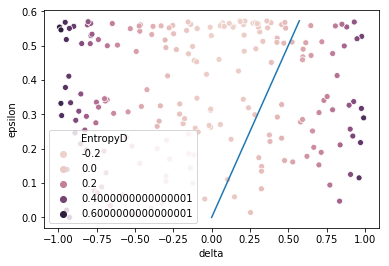

In [52]:
fig, ax = plt.subplots()
sns.scatterplot(x = 'Delta', y = 'Epsilon', hue = 'EntropyD', data = df)
sns.lineplot(x = 'Epsilon', y = 'Epsilon', data = df)
plt.xlabel('delta')
plt.ylabel('epsilon')